In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

# case_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 27, 28, 29, 30, 31, 32, 33, 34, 35, 54, 55, 56, 57, 58, 59, 60, 61, 62]
# case_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
case_list = [54, 55, 56, 57, 58, 59, 60, 61, 62]

all_cases = [f"Caso_{i}" for i in case_list]
missing_cases = []

folder_path = pathlib.Path("./")

delta_p_data = {}
residual_data = {}
outlet_data = {}
inlet_data = {}

print([d for d in folder_path.iterdir()])

for case in all_cases:
    try:
        pressure_probe = pd.read_csv(folder_path / case / "center_horizontal_line.csv")
        delta_p = (pressure_probe["p"].iloc[-1] - pressure_probe["p"].iloc[-2])
        delta_L = (pressure_probe["Points_x"].iloc[-1] - pressure_probe["Points_x"].iloc[-2])
        df = pd.DataFrame({"Delta_p_analytic": [8.0], "Delta_p_PINN": [-delta_p / delta_L]})
        delta_p_data[case] = df
        
        df = pd.read_csv(folder_path / case / "result.csv")
        residual_data[case] = df
        
        df = pd.read_csv(folder_path / case / "outlet_probe.csv")
        outlet_data[case] = df
        
        df = pd.read_csv(folder_path / case / "inlet_probe.csv")
        inlet_data[case] = df
    except:
        # print(case)
        missing_cases.append(case)
        
missing_cases

[WindowsPath('.git'), WindowsPath('.gitignore'), WindowsPath('api'), WindowsPath('case_0_3.log'), WindowsPath('case_29-.log'), WindowsPath('case_all.log'), WindowsPath('Casos.rar'), WindowsPath('Casos_Pablo.rar'), WindowsPath('Caso_0'), WindowsPath('Caso_1'), WindowsPath('Caso_2'), WindowsPath('Caso_27'), WindowsPath('Caso_28'), WindowsPath('Caso_29'), WindowsPath('Caso_3'), WindowsPath('Caso_30'), WindowsPath('Caso_31'), WindowsPath('Caso_32'), WindowsPath('Caso_33'), WindowsPath('Caso_34'), WindowsPath('Caso_35'), WindowsPath('Caso_4'), WindowsPath('Caso_5'), WindowsPath('Caso_54'), WindowsPath('Caso_55'), WindowsPath('Caso_56'), WindowsPath('Caso_57'), WindowsPath('Caso_58'), WindowsPath('Caso_59'), WindowsPath('Caso_6'), WindowsPath('Caso_60'), WindowsPath('Caso_61'), WindowsPath('Caso_62'), WindowsPath('Caso_7'), WindowsPath('Caso_8'), WindowsPath('deepxde-custom.rar'), WindowsPath('ENCIT_CASE.rar'), WindowsPath('low_training'), WindowsPath('models'), WindowsPath('notebooks'), Win

[]

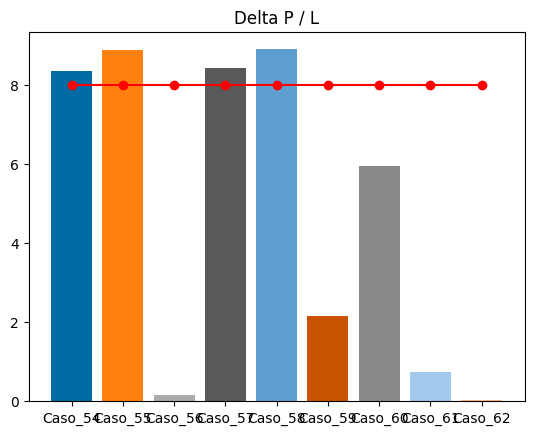

In [2]:
import numpy as np

x = []
y = []

analytic_val = 0

for case, data in delta_p_data.items():
    x.append(case)
    y.append(data["Delta_p_PINN"].iloc[0])
    analytic_val = data["Delta_p_analytic"].iloc[0]
    plt.bar(case, data["Delta_p_PINN"].iloc[0])

plt.title("Delta P / L")
plt.plot(x, np.repeat(analytic_val, len(x)), color="red", marker="o")
plt.show()

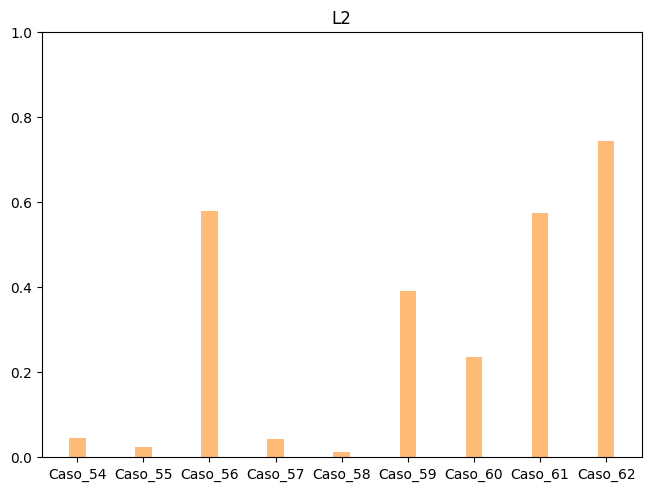

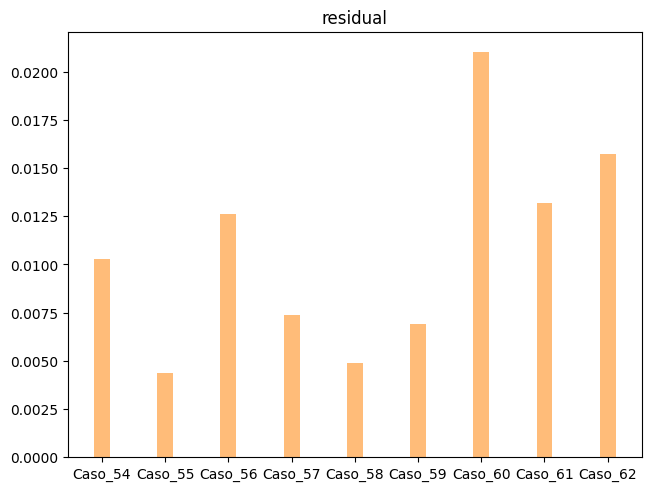

In [3]:
import numpy as np

fig, ax = plt.subplots(layout='constrained')
fig2, ax2 = plt.subplots(layout='constrained')

x = []
l2_diff_u = []
residual = []

anall2_diff_uytic_val = 0

for case, data in residual_data.items():
    x.append(case)
    residual.append(data["residual"].iloc[0])
    l2_diff_u.append(data["l2_diff_u"].iloc[0])

    ax.bar(x, l2_diff_u, 0.25, label="L2")
    ax2.bar(x, residual, 0.25, label="residual")

ax.set_title("L2")
ax2.set_title("residual")
ax.set_ylim([0, 1])  
plt.show()

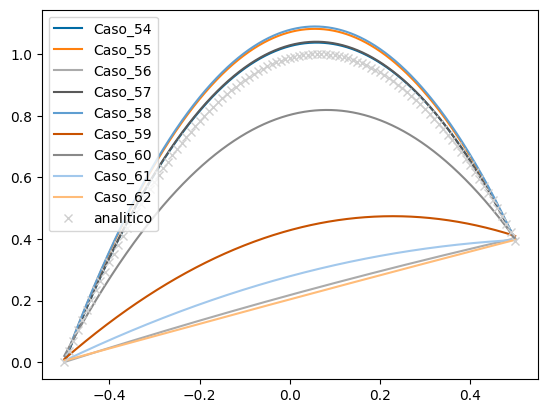

In [4]:
plt.close()

def u_analytic(x, mu, v_i, D, pressure_gradient):
    position = x - x.min()
    return np.array(
        1
        / mu
        * (
            position**2 / 2 * pressure_gradient
            + (mu * v_i / D - D / 2 * pressure_gradient) * position
        ),
        dtype=np.float32,
    )
data = [d for c,d in outlet_data.items()][0]
analytic_pos = data["Points_y"].to_numpy()[::10]
u_prof = u_analytic(analytic_pos, 1, 0.5, 1, -8)
u_max = u_prof.max()

for case, data in outlet_data.items():
    # if int(case.replace("Caso_", "")) > 1:
    #     break
    plt.plot(data["Points_y"], data["u"] / u_max, label=case)
plt.plot(analytic_pos, u_prof / u_max, label="analitico", marker="x", linestyle="none")

plt.legend()
plt.show()

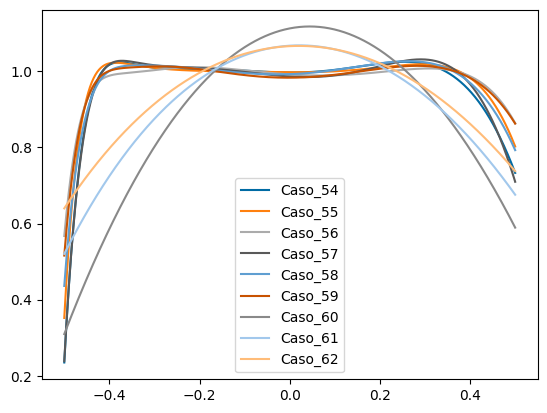

In [5]:
plt.close()

for case, data in inlet_data.items():
    plt.plot(data["Points_y"], data["u"], label=case)

plt.legend()
plt.show()